# Monitoring IoT Arduino Sensor With SQLite3 in Real Time

<img src="https://github.com/leehaesung/NodeRED/raw/master/02_CodeFiles/11_SigFox/01_Images/SigFox_For_Arduino.jpg" height="400" width="450" >

<img src="https://github.com/leehaesung/NodeRED/blob/master/02_CodeFiles/11_SigFox/01_Images/SigFoxArduinoForIoTDataAnalytics.png?raw=true" height="400" width="450" >

* How to install Paho - MQTT :
```
sudo pip install paho-mqtt
```

## CREATE TABLE

* SQLite <b>CREATE TABLE</b> statement is used to <b>create</b> a new table in any of the given database. Creating a basic table involves naming the table and defining its columns and each column's data type.

In [2]:
import sqlite3

conn = sqlite3.connect('sqliteIoTempSensor')
conn.execute('''CREATE TABLE HOME
         (TIME INT PRIMARY KEY     NOT NULL,
         LOCAL           INT    NOT NULL,
         TEMP            INT     NOT NULL);''')
print "Table created successfully";

conn.close()

Table created successfully


## INSERT QUERY FOR UNIT TESTING

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [3]:
import sqlite3

conn = sqlite3.connect('sqliteIoTempSensor')
print "Opened database successfully";

conn.execute("INSERT INTO HOME (TIME,LOCAL,TEMP) \
      VALUES (1512033190, 11302013, 35.43 )");

conn.commit()
print "Records created successfully";
conn.close()

Opened database successfully
Records created successfully


## SEARCH THE SPECIFIC TEMPERATURE DATA

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [2]:
import sqlite3

conn = sqlite3.connect('sqliteIoTempSensor')
print "Opened database successfully";

cursor = conn.execute("SELECT * from HOME WHERE TEMP = 10.08")
for row in cursor:
   print "Timestamp   = ", row[0]
   print "Local Time  = ", row[1]
   print "Temperature = ", row[2], "\n"
   

print "Operation done successfully";
conn.close()

Opened database successfully
Timestamp   =  1512379439
Local Time  =  171204202359
Temperature =  10.08 

Operation done successfully


In [3]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteIoTempSensor')
print "Opened database successfully"
print ""
print("Timestamp  |Local Time | Temperature")
print("=======================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP = 10.08")
for row in cursor:
    print(row[0],row[1],row[2])
    
conn.close()

Opened database successfully

Timestamp  |Local Time | Temperature
(1512379439, 171204202359, 10.08)


In [4]:
import sqlite3

def search_temperature(temp):
    conn = sqlite3.connect('sqliteIoTempSensor')

    str1 = "SELECT * FROM HOME WHERE TEMP = "
    str2 = str(temp)
    str3 = ";"
    sql = str1 + str2 + str3
    cursor = conn.execute(sql)

    print "Opened database successfully"
    print ""
    print("Timestamp  |Local Time | Temperature")
    print("======================================")
    
    for row in cursor:
        print(row[0],row[1],row[2])

In [5]:
# Put any temperature.
search_temperature(10.08)

Opened database successfully

Timestamp  |Local Time | Temperature
(1512379439, 171204202359, 10.08)


# Eclipse Paho™ MQTT Python Pub/Sub Client

In [1]:
import sys
try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

topics = ['sigfoxarduinosqlite']

m = subscribe.simple(topics, hostname="iot.eclipse.org", retained=False, msg_count=2)
for a in m:
    print(a.topic)
    print(a.payload)

sigfoxarduinosqlite
{"data":{"device":"002BF0FA","time":1513437452325,"local":20171217021732,"temp":33.44}}
sigfoxarduinosqlite
{"data":{"device":"002BF0FA","time":1513437514715,"local":20171217021834,"temp":34.08}}


In [ ]:
import sys
try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    print("%s : %s" % (message.topic, message.payload))
    buf = message.payload
    
subscribe.callback(print_msg, "sigfoxarduinosqlite", hostname="iot.eclipse.org")

sigfoxarduinosqlite : {"data":{"device":"002BF0FA","time":1514106282507,"local":20171224200442,"temp":15.36}}
sigfoxarduinosqlite : {"data":{"device":"002BF0FA","time":1514106295883,"local":20171224200455,"temp":31.68}}
sigfoxarduinosqlite : {"data":{"device":"002BF0FA","time":1514106310485,"local":20171224200510,"temp":10.24}}
sigfoxarduinosqlite : {"data":{"device":"002BF0FA","time":1514106331061,"local":20171224200531,"temp":30.4}}
sigfoxarduinosqlite : {"data":{"device":"002BF0FA","time":1514106348436,"local":20171224200548,"temp":35.84}}
sigfoxarduinosqlite : {"data":{"device":"002BF0FA","time":1514106369641,"local":20171224200609,"temp":38.4}}
sigfoxarduinosqlite : {"data":{"device":"002BF0FA","time":1514106400377,"local":20171224200640,"temp":23.04}}
sigfoxarduinosqlite : {"data":{"device":"002BF0FA","time":1514106429415,"local":20171224200709,"temp":29.76}}
sigfoxarduinosqlite : {"data":{"device":"002BF0FA","time":1514106455583,"local":20171224200735,"temp":29.76}}
sigfoxarduin

##  INSERT QUERY (IN REAL TIME)

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [ ]:
import sys 
import sqlite3
import locale
import json

conn = sqlite3.connect('sqliteIoTempSensor')
print "Opened database successfully";
print ""
print "INSERT OPERATION"
print(" Timestamp   | Local Time | Temperature")
print("=========================================")

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    #print("%s : %s" % (message.topic, message.payload))
    data = message.payload
    # {"data":{"time":1512377642,"local":171204195402,"temp":25.62}}
    jsonData = json.loads(data)
    time = str(jsonData['data']['time'])
    local = str(jsonData['data']['local'])
    temp = str(jsonData['data']['temp'])
    
        
    
    print(time, local, temp)
    
    str1 = "INSERT INTO HOME (TIME,LOCAL,TEMP) \
      VALUES ("
    str2 = time 
    str3 = ", "
    str4 = local
    str5 = ", "
    str6 = temp
    str7 = " )"
    insert = str1 + str2 + str3 + str4 + str5 + str6 + str7
    conn.execute(insert)
    conn.commit()

subscribe.callback(print_msg, "sigfoxarduinosqlite", hostname="iot.eclipse.org")

Opened database successfully

INSERT OPERATION
 Timestamp   | Local Time | Temperature
('1514106780756', '20171224201300', '29.28')
('1514106791396', '20171224201311', '29.28')
('1514106819085', '20171224201339', '15.36')
('1514106826224', '20171224201346', '29.28')
('1514106842828', '20171224201402', '29.28')
('1514106860665', '20171224201420', '29.28')
('1514106884699', '20171224201444', '29.28')
('1514106917873', '20171224201517', '29.76')
('1514106943495', '20171224201543', '30.08')
('1514106954592', '20171224201554', '30.24')
('1514106967065', '20171224201607', '29.92')
('1514106979761', '20171224201619', '30.4')
('1514107003538', '20171224201643', '1.6')
('1514107018383', '20171224201658', '30.4')
('1514107049980', '20171224201729', '31.04')
('1514107065930', '20171224201745', '31.04')
('1514107087004', '20171224201807', '30.88')
('1514107100462', '20171224201820', '31.2')
('1514107143669', '20171224201903', '31.2')
('1514107154020', '20171224201914', '31.68')
('1514107167751', '

## SELECT QUERY

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [32]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteIoTempSensor')
print "Opened database successfully"
print ""
print("Timestamp  |Local Time | Temperature")
print("======================================")
cursor = conn.execute("SELECT * from HOME")
for row in cursor:
    print(row[0],row[1],row[2])
    
conn.close()

Opened database successfully

Timestamp  |Local Time | Temperature
(1514106780756, 20171224201300, 29.28)
(1514106917873, 20171224201517, 29.76)
(1514106943495, 20171224201543, 30.08)
(1514106954592, 20171224201554, 30.24)
(1514106979761, 20171224201619, 30.4)
(1514107049980, 20171224201729, 31.04)


## SELECT QUERY & PUSH/POP DATA INTO BOX

In [1]:
import sqlite3

class Stack:
    
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self, item):
        return self.items.pop(item)

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)


tempBox = Stack()
temPopBox = Stack() 
humBox = Stack()
timeBox = Stack()

conn = sqlite3.connect('sqliteIoTempSensor')
print "Opened database successfully"
print ""

cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    tempBox.push(row[2])
    temPopBox.push(row[2])
    #print(row[0],row[1],row[2])

# Making time = 1,2,3,4 .... n    
max = len(tempBox.items)

for count in range(1,max+1):
    timeBox.push(count)
    
print timeBox.items
print ""    
print tempBox.items
print ""

xTime = timeBox.items
yData = tempBox.items
tData = temPopBox.items

# Comparing between max and min in tData
highBit = tData.pop(max-1)
lowBit = tData.pop(0)

if highBit > lowBit:
    print "This data is ascending."

elif highBit < lowBit:
    print "This data is descending."
    
elif highBit == lowBit:
    print "This data is stable."

    
conn.close()
#max = len(tempBox.items)
#for count in range(1,max+1):
#    timeBox.push(count)
    #print (count)

Opened database successfully

[1, 2, 3, 4, 5, 6]

[29.28, 29.76, 30.08, 30.24, 30.4, 31.04]

This data is ascending.


In [2]:
print tData
print "The tData poped 2 data. So the tData reduced it"

[29.76, 30.08, 30.24, 30.4]
The tData poped 2 data. So the tData reduced it


In [3]:
print highBit
print lowBit

31.04
29.28


## DELETE QUERY

* SQLite <b>DELETE QUERY</b> is used to <b>delete</b> the existing records from a table. You can use WHERE clause with <b>DELETE QUERY</b> to <b>delete</b> the selected rows, otherwise all the records would be deleted.

In [31]:
import sqlite3

conn = sqlite3.connect('sqliteIoTempSensor')
print "Opened database successfully";

#conn.execute("DELETE from HOME where LOCAL = 20171224201820;")
conn.execute("DELETE FROM HOME WHERE TIME BETWEEN 1514107143669 AND 1514107268441;")
#conn.commit("DELETE FROM HOME WHERE TIME <= strftime('%s','now') - strftime('%s','2017-10-07 02:34:56');")

print "Total number of rows deleted :", conn.total_changes

print ""
print("Timestamp  |Local Time | Temperature")
print("======================================")
cursor = conn.execute("SELECT * from HOME")
for row in cursor:
    print(row[0],row[1],row[2])

print "Operation done successfully";
conn.commit()
conn.close()

Opened database successfully
Total number of rows deleted : 9

Timestamp  |Local Time | Temperature
(1514106780756, 20171224201300, 29.28)
(1514106917873, 20171224201517, 29.76)
(1514106943495, 20171224201543, 30.08)
(1514106954592, 20171224201554, 30.24)
(1514106979761, 20171224201619, 30.4)
(1514107049980, 20171224201729, 31.04)
Operation done successfully


# DROP TABLE  (Be careful!!)

* SQLite <b>DROP TABLE</b> statement is used to <b>remove</b> a table definition and all associated data, indexes, triggers, constraints, and permission specifications for that table.

In [2]:
import sqlite3
conn = sqlite3.connect('sqliteIoTempSensor')
cur = conn.cursor()
sql = "DROP TABLE HOME;"
cur.execute(sql)
print "Deleted the table successfully"
conn.commit()
conn.close()

Deleted the table successfully


# TensorFlow Analytics

* Linear Regression
     ```
     Linear Regression Model = W * x + b
     ```

In [4]:
# From https://www.tensorflow.org/get_started/get_started
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
#x_train = [1, 2, 3, 4, 5]
#y_train = [9.76, 10.08, 10.24, 10.4, 10.56]
x_train = xTime
y_train = yData
print("x data = %s"%(xTime))
print("y data = %s"%(yData))
print("")

# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000): # 1000
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

x data = [1, 2, 3, 4, 5, 6]
y data = [29.28, 29.76, 30.08, 30.24, 30.4, 31.04]

W: [ 0.31086129] b: [ 29.04531479] loss: 0.0838704


### Plotting Graph

         Linear Regression Model

This data is ascending.


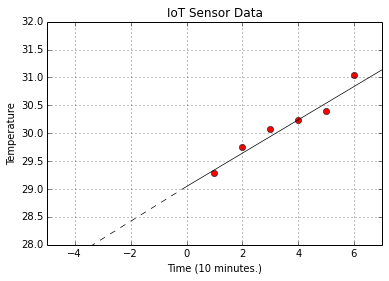

x data = [1, 2, 3, 4, 5, 6]
y data = [29.28, 29.76, 30.08, 30.24, 30.4, 31.04]

w = [ 0.31086129] 
b = [ 29.04531479] 

Linear Regression Model:
Y = w*x + b = [ 0.31086129]x + [ 29.04531479]

If x = 0, y = [ 29.04531479]  
If y = 0, x = [-93.43496704]  


In [6]:
# "np" and "plt" are common aliases for NumPy and Matplotlib, respectively.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# x_train represents the features of our training data, the diameters of the pizzas.
# A scikit-learn convention is to name the matrix of feature vectors X. 
# Uppercase letters indicate matrices, and lowercase letters indicate vectors.
x_train = np.array([xTime]).reshape(-1, 1)
#y_train = [35.43, 28.8, 28.48, 28.16, 28.16]

plt.figure()
plt.title('IoT Sensor Data')
plt.xlabel('Time (10 minutes.)')
plt.ylabel('Temperature')
#plt.plot(x_train, y_train, 'k.')
plt.plot(x_train, y_train, 'ro')
plt.axis([-5, 7, 28, 32])
plt.grid(True)
# For example, W: [-1.5179733] b: [ 34.35990143] loss: 16.7751  loss means cost function
# y = W.x + b (or) y = a.x + b  
# y = -1.5179733 x + 34.35990143
# If x = 0, y = 34.35990143
# If y = 0, 1.5179733 x = 34.35990143, 
#           x = 34.35990143/1.5179733 = 22.6353793113  
w = abs(curr_W)
b = abs(curr_b)

print("         Linear Regression Model")
print("================================================")
print("")

if highBit > lowBit:
    minusData = -1
    print "This data is ascending."

elif highBit < lowBit:
    minusData = 1
    print "This data is descending."
    
elif highBit == lowBit:
    minusData = 1
    print "This temperature data is stable."


#If y = 0, x = b/w
x = minusData*(b/w) 
# If the data increases, it should add "-(minux)"  (Ex) x = -(b/w)  
# but If the data decreases, it should remove it.  (Ex) x =  (b/w)

#plt.plot([0, -x], [b, 0], color='k', linestyle='-', linewidth=0.7)
plt.plot([0, x], [b, 0], color='k', linestyle='--', linewidth=0.7)
plt.plot([30, 0], [38, b], color='k', linestyle='-', linewidth=0.7)
#plt.plot([0, 2.6353793], [34.35990143, 0], color='k', linestyle='-', linewidth=0.7)
plt.show()

print("x data = %s"%(xTime))
print("y data = %s"%(yData))
print("")
print("w = %s "%(w))
print("b = %s "%(b))
print("")
print("Linear Regression Model:")
print("Y = w*x + b = %sx + %s"%(w,b))
print("")
print("If x = 0, y = %s  "%(b))
print("If y = 0, x = %s  "%(x))

### Predict next temperature after 10 mins, 20 mins, 30 mins, and 40 mins.

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression

#x_train = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
#y_train = [35.43, 28.8, 28.48, 28.16, 28.16]

# Create an instance of the estimator, LinearRegression
model = LinearRegression()
# Fit the model on the training data
model.fit(x_train, y_train)
# Predict the data of a temperature with a trend that has never been seen before
test_temp = np.array([[6]])
predicted_temp = model.predict(test_temp)[0]
print('After 10 minutes, it would be: %.2f °C .' % predicted_temp)

test_temp = np.array([[7]])
predicted_temp = model.predict(test_temp)[0]
print('After 20 minutes, it would be: %.2f °C .' % predicted_temp)

test_temp = np.array([[8]])
predicted_temp = model.predict(test_temp)[0]
print('After 30 minutes, it would be: %.2f °C .' % predicted_temp)

test_temp = np.array([[9]])
predicted_temp = model.predict(test_temp)[0]
print('After 40 minutes, it would be: %.2f °C .' % predicted_temp)

After 10 minutes, it would be: 30.91 °C .
After 20 minutes, it would be: 31.22 °C .
After 30 minutes, it would be: 31.53 °C .
After 40 minutes, it would be: 31.84 °C .


In [9]:
# Functions to show the Graphs

import numpy as np
from IPython.display import clear_output, Image, display, HTML


def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [10]:
show_graph(tf.get_default_graph())

## References

* SQLite Tutorial: https://www.tutorialspoint.com/sqlite/
* SQLite Quick Guide: https://www.tutorialspoint.com/sqlite/sqlite_quick_guide.htm
* SQLite - Python Tuotorial: https://www.tutorialspoint.com/sqlite/sqlite_python.htm
* SQLite - Python Quick Guide: https://github.com/leehaesung/SQLite-Python_Quick_Guide
* Get Started TensorFlow: https://www.tensorflow.org/get_started/get_started